### Handling Missing Value - Missing Category Imputation 
    Creating a New Category for Missing Values is a Missing Category Imputation technique used in data preprocessing for machine learning. Instead of trying to estimate the true value, this method treats the fact that the data is missing as a piece of information in itself and assigns it a unique label.
                                                                                                         
    -> How It's Work 
     - Identify Missing Values: Locate all NaN (Not a Number), None, or other designated missing value placeholders in a 
       categorical column (e.g., 'Color', 'Job Title').
    
     - Assign a New Label: Replace every missing value with a new, arbitrary, but descriptive category label such as 
       "Unknown," "Missing," or "Not Reported."

     -> Advantages
        - Preserves information, No data loss
        - Model learns missing patterns
        
     -> Disadvantages
        - Adds extra category
        - Not ideal for high-cardinality features  

### Import Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [10]:
data = pd.read_csv("train.csv",usecols=['GarageQual','SalePrice','FireplaceQu'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


### Get complete information about dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


### Check for null values

In [16]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

### Count of Categories Before Filling NaN Values 

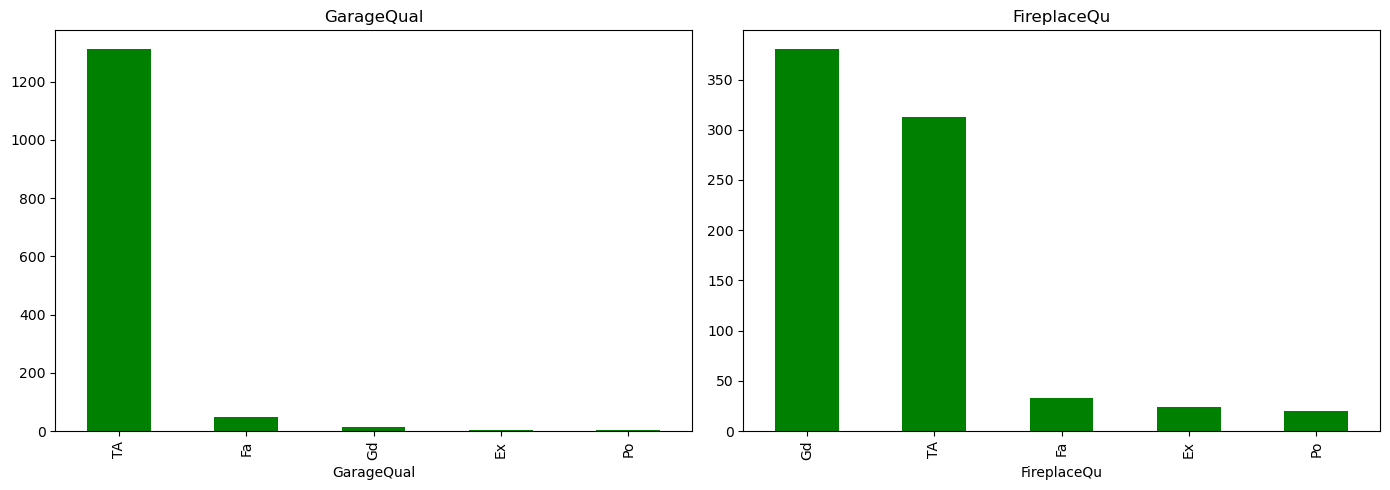

In [19]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
data['GarageQual'].value_counts().plot(kind='bar',color='green')
plt.title("GarageQual")

plt.subplot(1,2,2)
data['FireplaceQu'].value_counts().plot(kind='bar',color='green')
plt.title("FireplaceQu")
plt.tight_layout()
plt.show()

### Filling NaN Values 

In [25]:
data['GarageQual'].fillna('Missing',inplace=True)
data['FireplaceQu'].fillna('Missing',inplace=True)

### Count of Categories After Filling NaN Values 

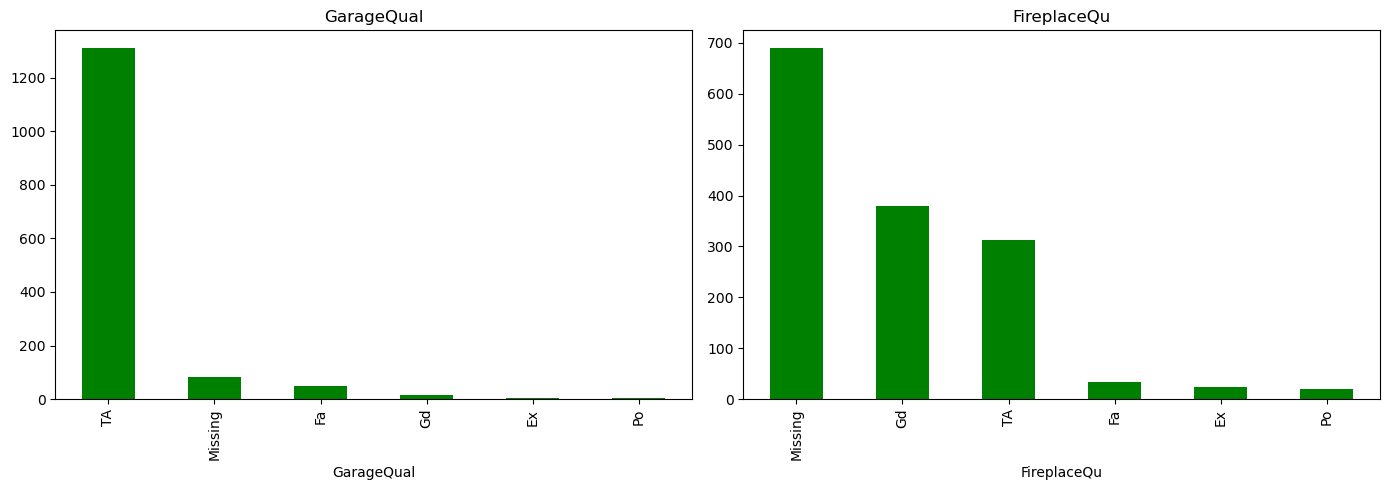

In [27]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
data['GarageQual'].value_counts().plot(kind='bar',color='green')
plt.title("GarageQual")

plt.subplot(1,2,2)
data['FireplaceQu'].value_counts().plot(kind='bar',color='green')
plt.title("FireplaceQu")
plt.tight_layout()
plt.show()

### Using Sklearn SimpleImputer()

In [38]:
X = data.drop('SalePrice',axis=1)
y = data['SalePrice']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### SimpleImputer

In [41]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [43]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [45]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

In [47]:
X_train = pd.DataFrame(X_train,columns=['FireplaceQu','GarageQual'])
X_train.head()

,FireplaceQu,GarageQual
0,Missing,TA
1,TA,TA
2,Missing,Missing
3,TA,TA
4,Gd,TA


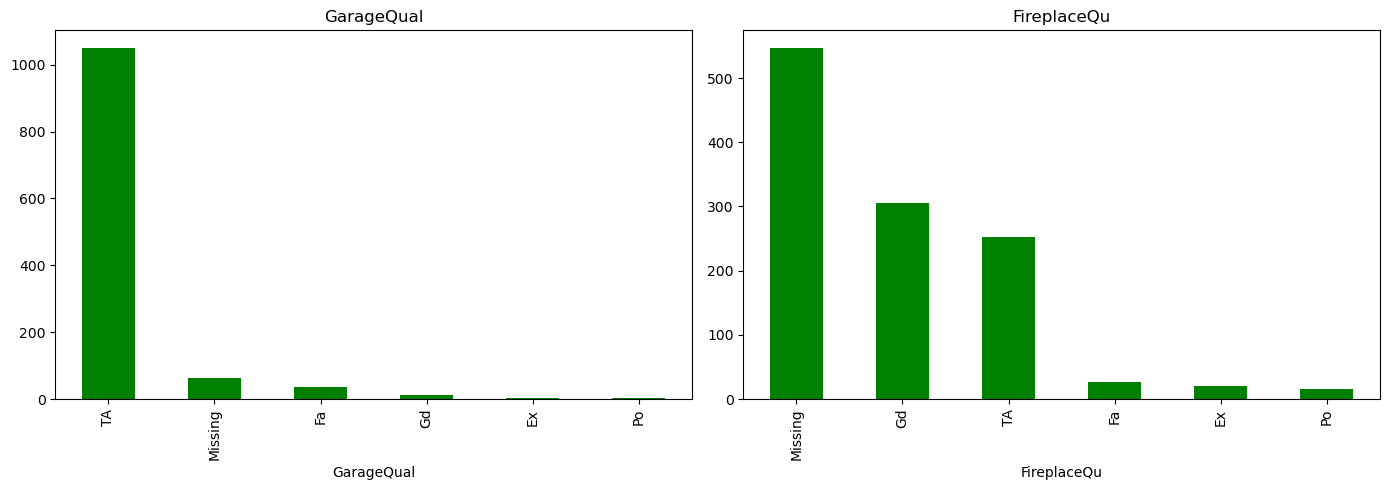

In [49]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
X_train['GarageQual'].value_counts().plot(kind='bar',color='green')
plt.title("GarageQual")

plt.subplot(1,2,2)
X_train['FireplaceQu'].value_counts().plot(kind='bar',color='green')
plt.title("FireplaceQu")
plt.tight_layout()
plt.show()